# 標高データの取得
標高データはcsvファイルを配布します。以下のコードで読み込むことができます。

In [466]:
import numpy as np

csv_path = '/Users/user/Desktop/dic/diveintocode-ml/week3/mtfuji_data.csv'

np.set_printoptions(suppress=True)
fuji = np.loadtxt(csv_path, delimiter=',', skiprows=1)

In [467]:
print(fuji[130:140])

[[  130.          35.352505   138.756638  2563.4      41888.      ]
 [  131.          35.35418    138.753742  2703.1      42210.      ]
 [  132.          35.355855   138.750846  2825.55     42532.      ]
 [  133.          35.35753    138.74795   2967.9      42854.      ]
 [  134.          35.359205   138.745054  3087.81     43177.      ]
 [  135.          35.36088    138.742157  3266.24     43499.      ]
 [  136.          35.362555   138.739261  3434.59     43821.      ]
 [  137.          35.36423    138.736364  3600.08     44143.      ]
 [  138.          35.365904   138.733468  3679.96     44466.      ]
 [  139.          35.367579   138.730571  3664.9      44788.      ]]


# 【問題1】データの可視化
Matplotlibを使い標高データを可視化してください。横軸に「その地点の番号」、縦軸に「標高」を設定すれば、富士山の断面図が描けます。

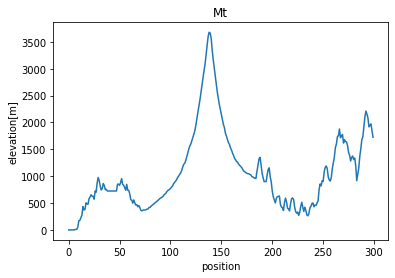

In [468]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.title('Mt')
plt.plot(fuji[:, 0], fuji[:, 3]);

# 【問題2】ある地点の勾配を計算する関数を作成
「二次元配列と勾配問題」では各地点での勾配を最初に求めました。しかし、暗闇の富士山を想像すると、知ることができるのは今いる地点の勾配だけです。

「今いる地点の番号」と「今いる隣の地点の番号（今いる地点の番号-1）」の関係による勾配を求める関数を作成してください。

In [469]:
sa = fuji[1:, (0, 3)] - fuji[:-1, (0, 3)]
grad = sa[:, 1] / sa[:, 0]

# 【問題3】移動先の地点を計算する関数を作成
今いる地点の勾配の情報を元に、次に移動先の地点を計算する関数を作成してください。

数式で表すと 「移動先の地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。

「今いる地点の勾配」は問題2で作成した関数の返り値を使用してください。
α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わります。ここでは例えば0.2に設定してください。

《実装上の注意》

上記式を計算すると移動先の地点には浮動小数点数が現れますが、今回勾配の情報を得るためには地点は整数で表す必要があります。そのため、四捨五入による変換を行ってください。また、取り得ない値となった場合の処理が必要です。例えば移動先の地点が負になると、そのようなデータが存在しないため、次に勾配が得られなくなります。

《ハイパーパラメータとは》

機械学習手法において、その手法自身では最適化が行えない値のことです。値によって手法の挙動は変化し、学習がうまくいくかどうかに影響を与えるため、設定は慎重に行う必要があります。最も単純には人間が考えて設定することになりますが、ハイパーパラメータを機械的に決めるための手法も存在します。

In [470]:
# 勾配を地点数に合わせるために要素０をはじめに追加
grad = np.concatenate([np.array([0]), grad])

def trans_pos(x_now, alpha=0.2):
    # α＝０.２
    
    trans = np.round(x_now - alpha*grad[x_now])
    return trans

# 【問題4】山を下る関数を作成
山を下る関数を作成してください。最初の地点を受け取り、問題3の関数によって地点を更新していきます。移動毎の地点はリストなどに記録して、これを関数の返り値としてください。

最初の「今いる地点」は富士山の頂上付近、136番の地点（標高3434.59[m]）とします。ここから山を下っていきましょう。

In [483]:
def gezan(x_now, alpha=0.2):
    
    trans_pos_list = [x_now]
    
    for _  in range(1000):
        
        trans = trans_pos(trans_pos_list[-1], alpha)
        # 整数型に変更して代入
        trans_pos_list.append(int(trans))
        
        # 過去の地点に戻ったら終わり
        if trans_pos_list[-1] in trans_pos_list[:-1]:
            return trans_pos_list
        
    return trans_pos_list

In [484]:
# 山頂からの下山
santyou_gezan_list = gezan(136)
santyou_gezan_list

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75, 75]

# 【問題5】下山過程の可視化
問題4における下山過程をMatplotlibを使いグラフで可視化してください。

《可視化例》

断面図の中に移動した地点を点で表示する
繰り返し毎の標高や勾配を折れ線グラフにする

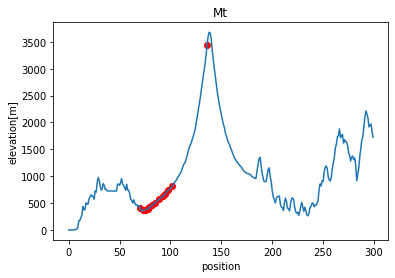

In [485]:
# 移動地点の断面図
plt.scatter(santyou_gezan_list, fuji[santyou_gezan_list, 3], c='r')

plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.title('Mt')
plt.plot(fuji[:, 0], fuji[:, 3]);

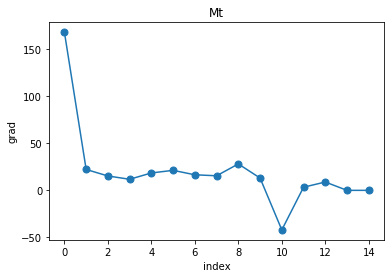

In [486]:
# 勾配の変化
plt.xlabel('index')
plt.ylabel('grad')
plt.title('Mt')
plt.plot(grad[santyou_gezan_list], marker="o", markersize=7);

# 【問題6】初期値の変更
問題4では最初の「今いる地点」を136としましたが、これを他の全ての点で計算してください。そして、いくつかの初期値に対してどのような下山過程となるか、問題5のように可視化してください。機械学習においては 初期値 をどう設定するかが結果に影響を与えることが確認できます。

《初期値とは》

今回の例での最初の地点のような値を初期値と呼びます。これを変更すると結果が変化します。例えば136と142では富士山の異なるの斜面を下ることになります。

In [487]:
# 現在地からの下山
now_gezan_list = gezan(200)
now_gezan_list

[200, 234, 251, 215, 239, 228, 206, 205, 198, 231, 247, 226, 239]

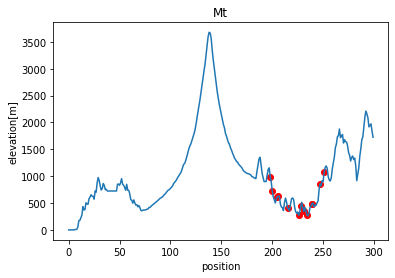

In [488]:
# 移動地点の断面図
plt.scatter(now_gezan_list, fuji[now_gezan_list, 3], c='r')

plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.title('Mt')
plt.plot(fuji[:, 0], fuji[:, 3]);

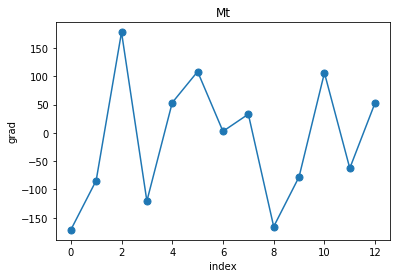

In [489]:
# 勾配の変化
plt.xlabel('index')
plt.ylabel('grad')
plt.title('Mt')
plt.plot(grad[now_gezan_list], marker="o", markersize=7);

# 【問題7】（アドバンス問題）ハイパーパラメータの変更
ハイパーパラメータ 
α
 を変化させるとどのような下山過程となるか、問題5のように可視化してください。そして、ハイパーパラメータにより結果が大きく異なることを確認してください。

In [490]:
# 現在地からの下山
# α変更
ad_gezan_list = gezan(136, 0.01)
ad_gezan_list

[136,
 134,
 133,
 132,
 131,
 130,
 129,
 128,
 127,
 126,
 125,
 124,
 123,
 122,
 121,
 120,
 120]

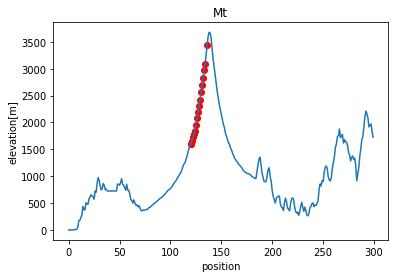

In [491]:
# 移動地点の断面図
plt.scatter(ad_gezan_list, fuji[ad_gezan_list, 3], c='r')

plt.xlabel('position')
plt.ylabel('elevation[m]')
plt.title('Mt')
plt.plot(fuji[:, 0], fuji[:, 3]);

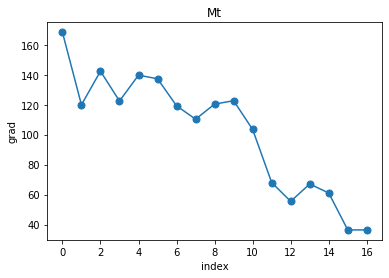

In [492]:
# 勾配の変化
plt.xlabel('index')
plt.ylabel('grad')
plt.title('Mt')
plt.plot(grad[ad_gezan_list], marker="o", markersize=7);